
<h2 style='font-family: Agency FB; font-weight: 600; font-size: 30px; text-align: center'>Tanzania Regions Visualization</h2>

<p style='font-family: Agency FB; font-weight: 600; font-size: 20px; text-align: center'>Author: Jabulente</p>

-----

<h2 style='font-family: Courier New; font-weight: 600; font-size: 20px; text-align: left'>1.0. Import Required Libraries</h2>


----- Libraries Loaded Successfully -----



<h2 style='font-family: Courier New; font-weight: 600; font-size: 20px; text-align: left'>2.0. Importing and Inspecting Dataset</h2>

In [3]:
def load_dataset(filepath: str) -> gpd.GeoDataFrame:
    gdf = gpd.read_file(filepath)
    gdf["salary"] = np.random.randint(400, 12000, size=len(gdf))

    gdf_projected = gdf.to_crs(epsg=3035)
    gdf_projected["centroid"] = gdf_projected.geometry.centroid
    gdf["centroid"] = gdf_projected["centroid"].to_crs(gdf.crs)

    return gdf

if __name__ == "__main__":
    gdf = load_dataset("./Datasets/Regions.shp")
    display(gdf.sample(15))




,Region_Cod,Region_Nam,geometry,salary,centroid
3,13,Singida,"POLYGON ((34.92725 -4.26445, 34.92725 -4.26445...",3819,POINT (34.49322 -5.74155)
17,20,Mara,"MULTIPOLYGON (((33.33205 -2.28309, 33.3327 -2....",5631,POINT (34.39495 -1.85094)
21,02,Arusha,"POLYGON ((36.41799 -2.34615, 36.4179 -2.34638,...",5384,POINT (35.9398 -2.95568)
12,09,Mtwara,"MULTIPOLYGON (((40.37704 -10.28385, 40.37401 -...",5177,POINT (39.11235 -10.77228)
26,51,Kaskazini Unguja,"MULTIPOLYGON (((39.38456 -5.82215, 39.3839 -5....",10674,POINT (39.28794 -5.91885)
18,10,Ruvuma,"POLYGON ((35.91608 -9.31468, 35.91783 -9.31741...",682,POINT (36.20034 -10.72697)
15,03,Kilimanjaro,"POLYGON ((37.27536 -2.85503, 37.28929 -2.85814...",10002,POINT (37.64193 -3.76059)
2,25,Geita,"MULTIPOLYGON (((31.81682 -2.69945, 31.8154 -2....",4540,POINT (31.89794 -3.29704)
27,52,Kusini Unguja,"POLYGON ((39.3993 -6.02154, 39.39952 -6.02157,...",7894,POINT (39.42318 -6.23868)
14,14,Tabora,"MULTIPOLYGON (((32.67516 -4.10147, 32.67514 -4...",7322,POINT (32.81785 -5.25769)


<h2 style='font-family: Courier New; font-weight: 600; font-size: 20px; text-align: left'>2.0. Configuration</h2>

In [24]:
TANZANIA_ZONES = {
    "Lake Zone": ["Kagera", "Geita", "Mwanza", "Mara", "Simiyu", "Shinyanga"],
    "Northern Zone": ["Arusha", "Kilimanjaro", "Tanga", "Manyara"],
    "Central Zone": ["Dodoma", "Singida", "Tabora"],
    "Southern Zone": ["Lindi", "Mtwara", "Ruvuma"],
    "Southern Highlands": ["Iringa", "Mbeya", "Njombe", "Songwe"],
    "Western Zone": ["Kigoma", "Tabora", "Katavi"],
    "Pemba": ["Kaskazini Pemba", "Kusini Pemba"],
    "Unguja": ["Mjini Magharibi", "Kusini Unguja", "Kaskazini Unguja"],
}

OUTPUT_PATH = './Outputs'
REGIONS_SHAPEFILE = "./Datasets/Regions.shp"

<h2 style='font-family: Courier New; font-weight: 600; font-size: 20px; text-align: left'>2.0. Visualization</h2>

Saved map: ./Outputs/Lake Zone.png


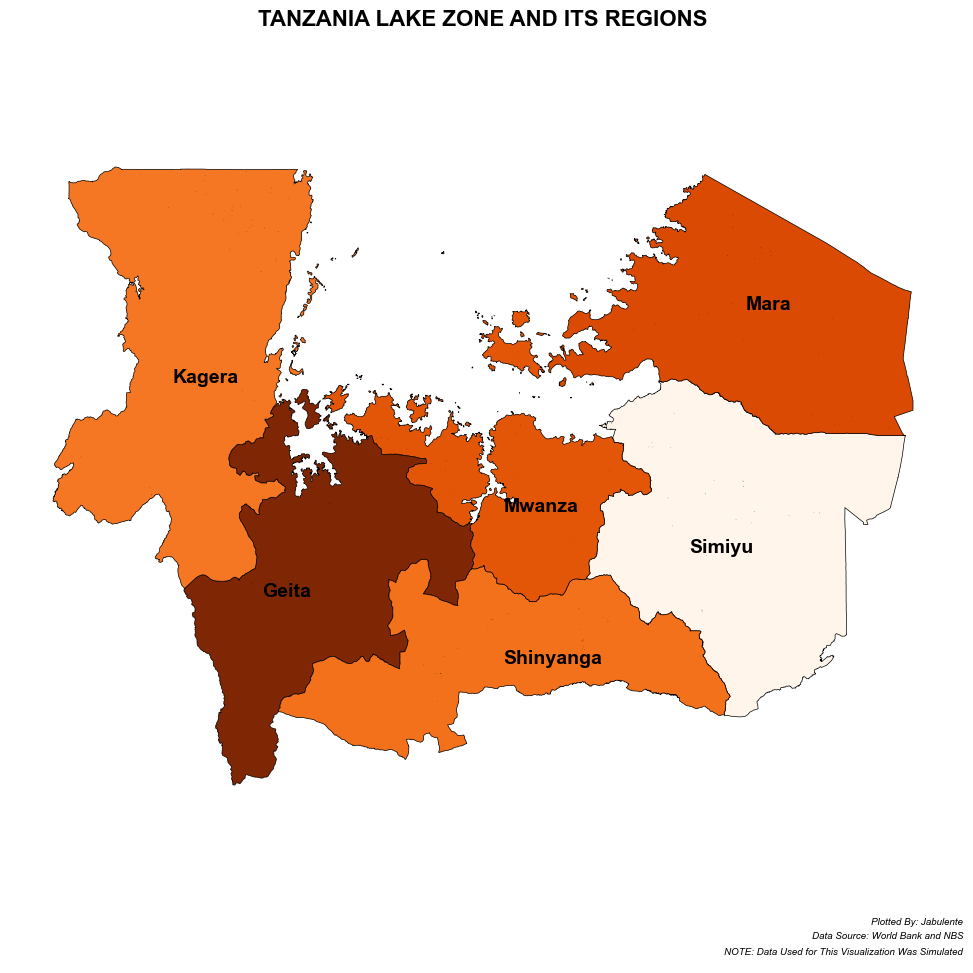

Saved map: ./Outputs/Northern Zone.png


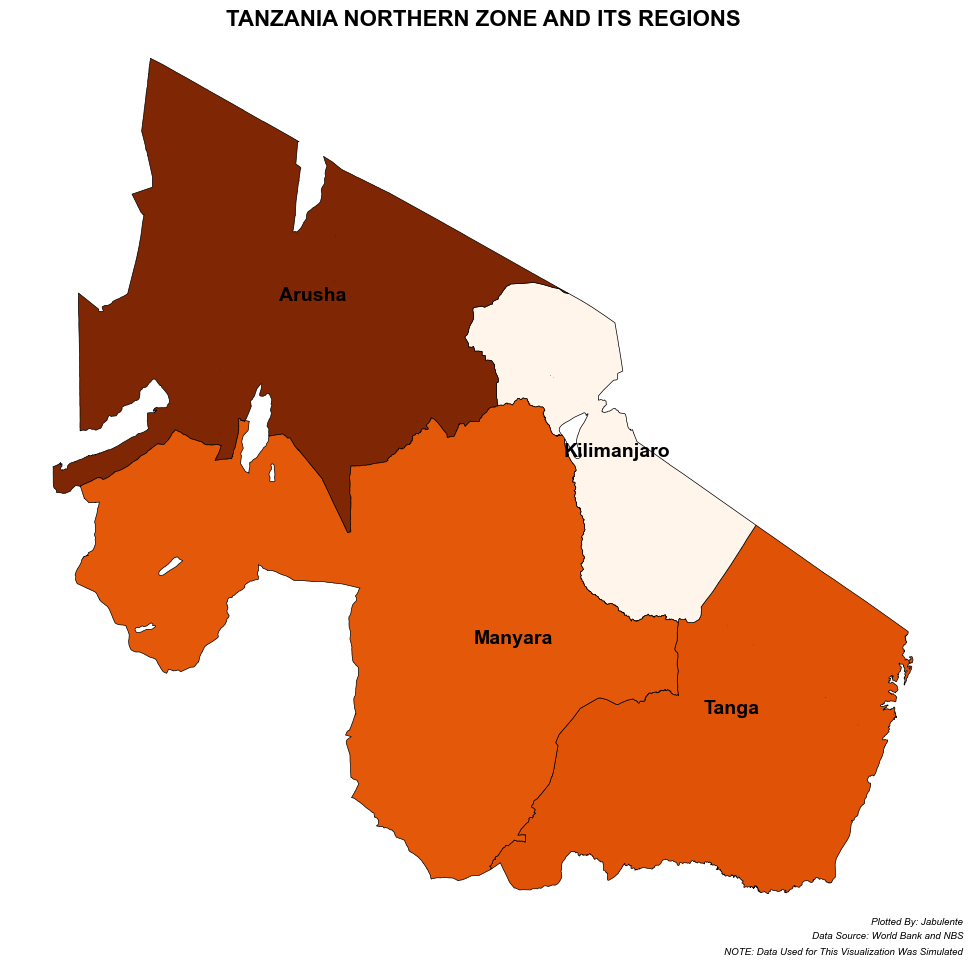

Saved map: ./Outputs/Central Zone.png


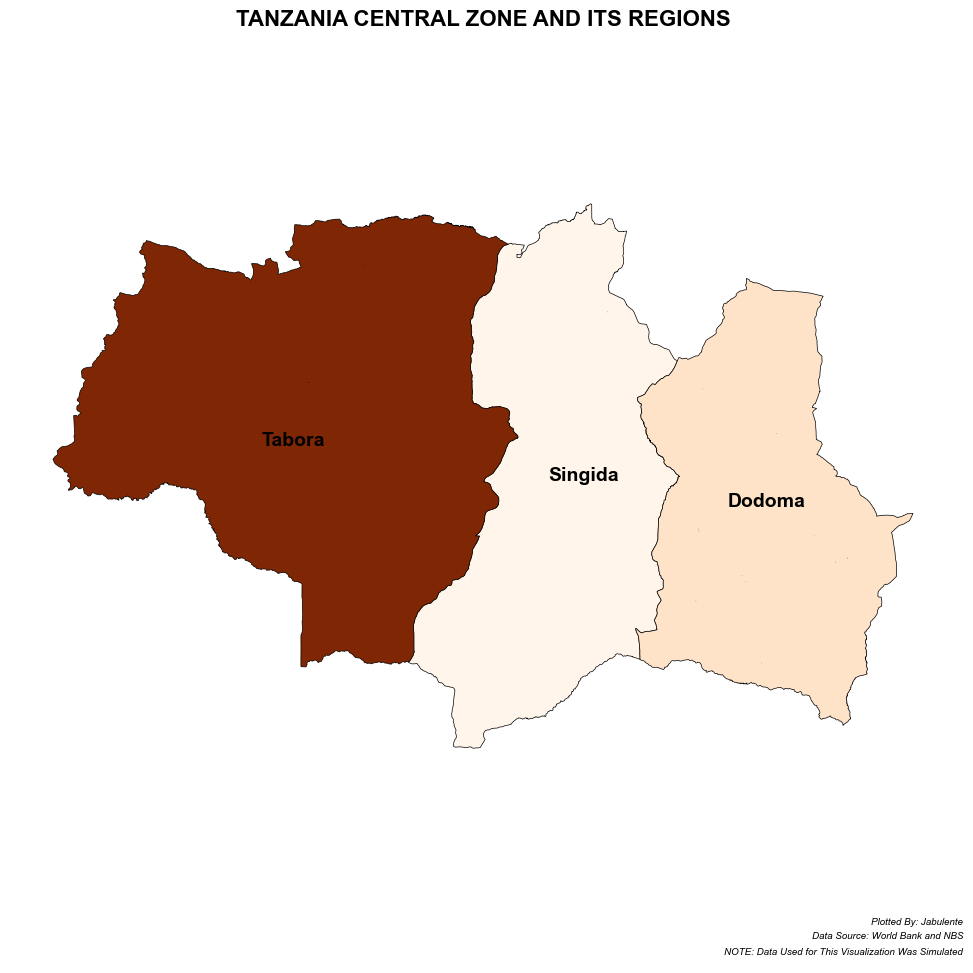

Saved map: ./Outputs/Southern Zone.png


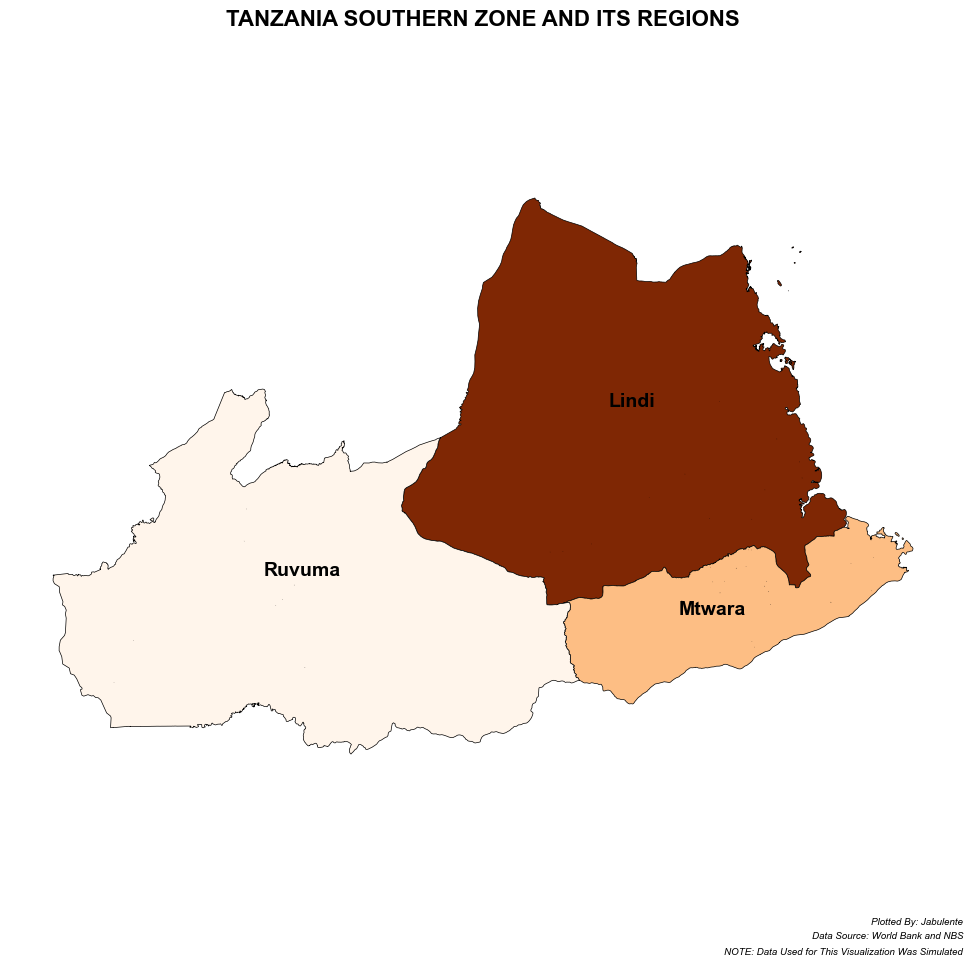

Saved map: ./Outputs/Southern Highlands.png


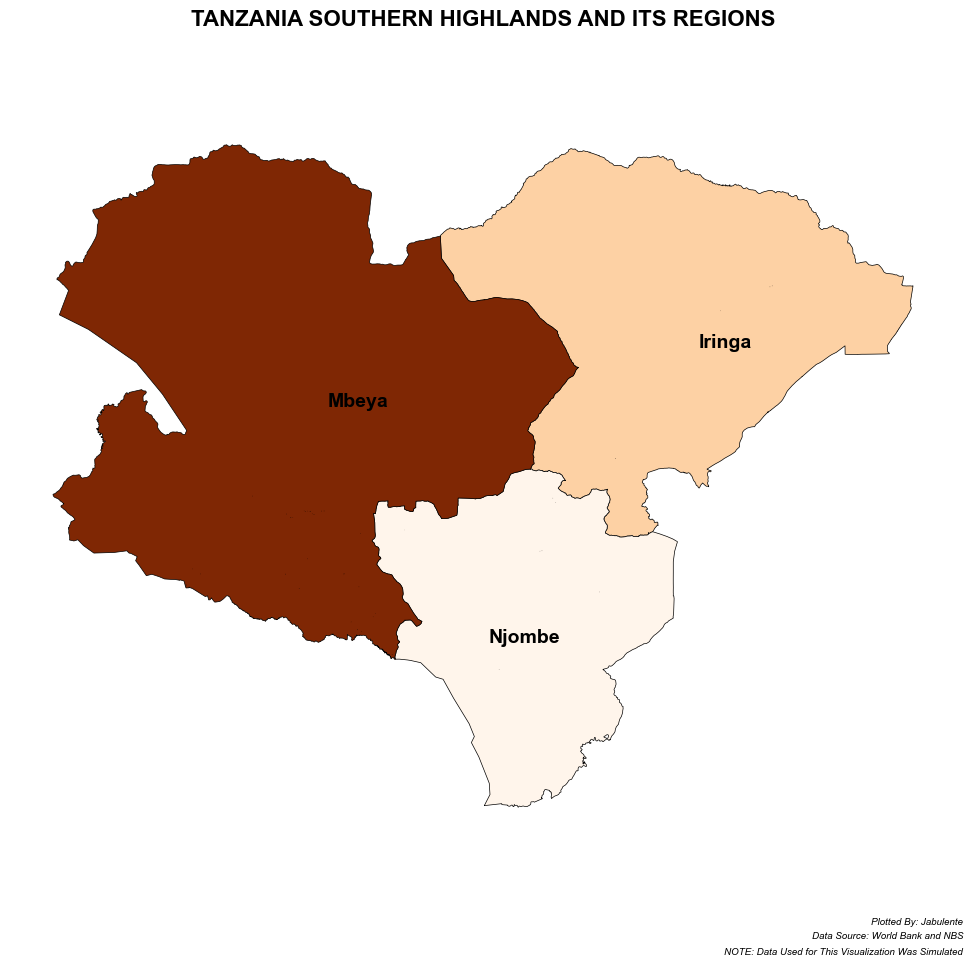

Saved map: ./Outputs/Western Zone.png


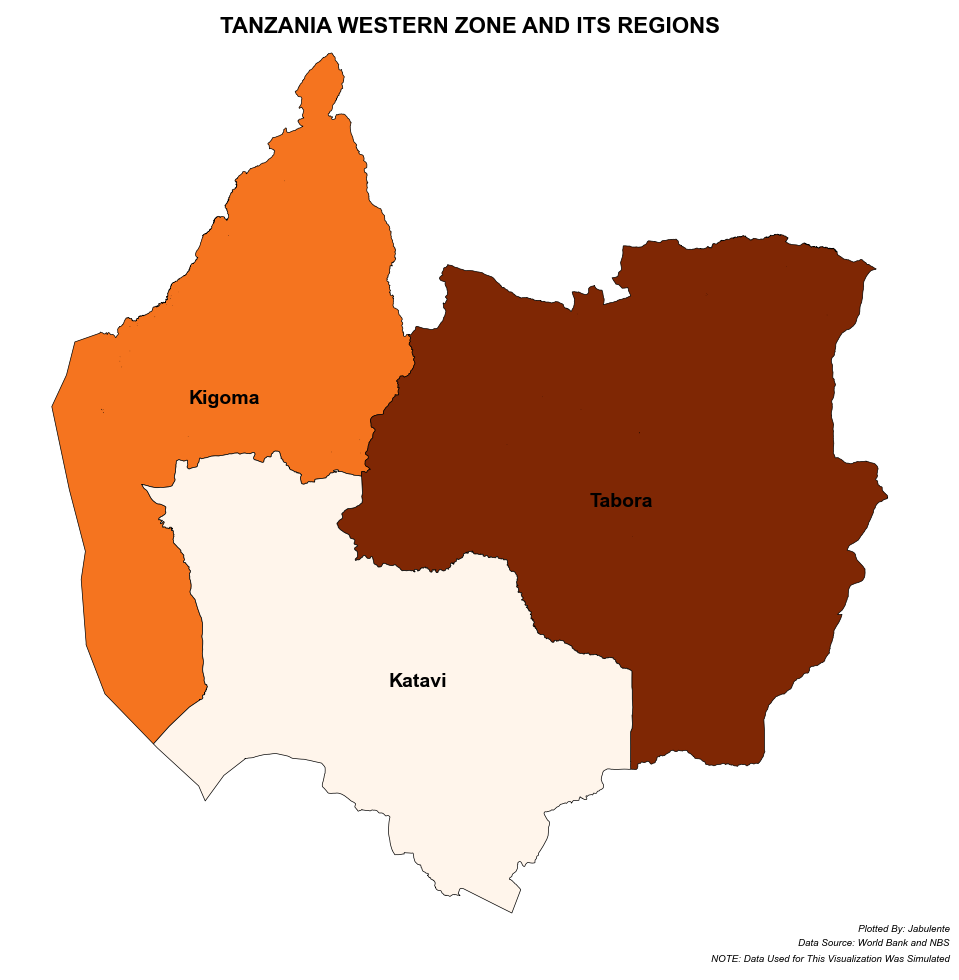

Saved map: ./Outputs/Pemba.png


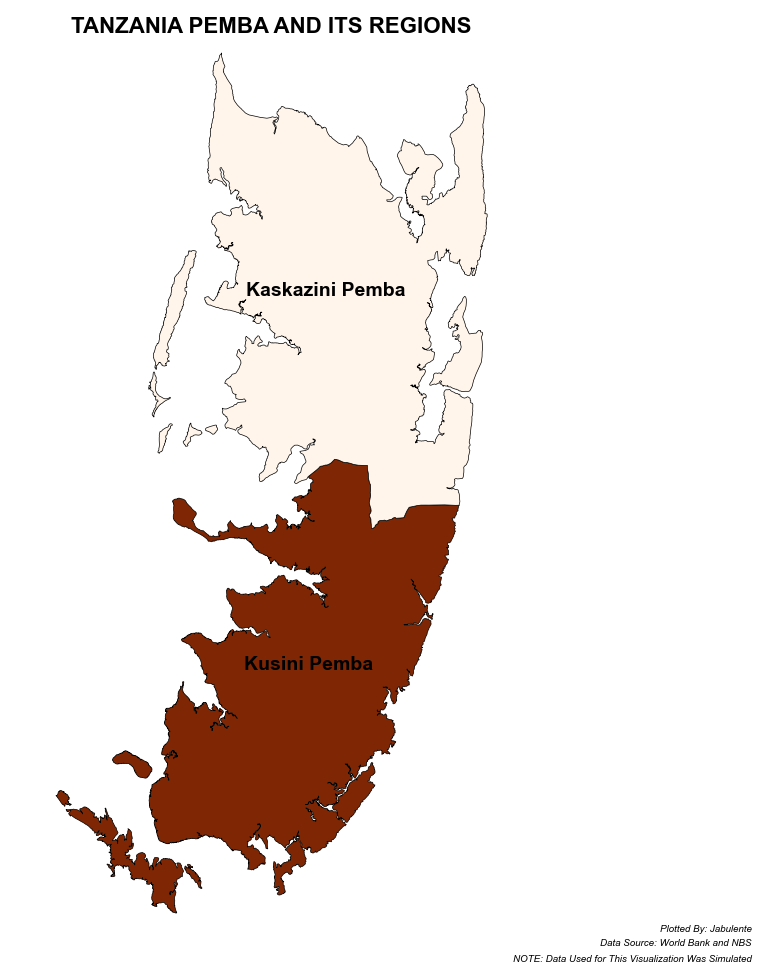

Saved map: ./Outputs/Unguja.png


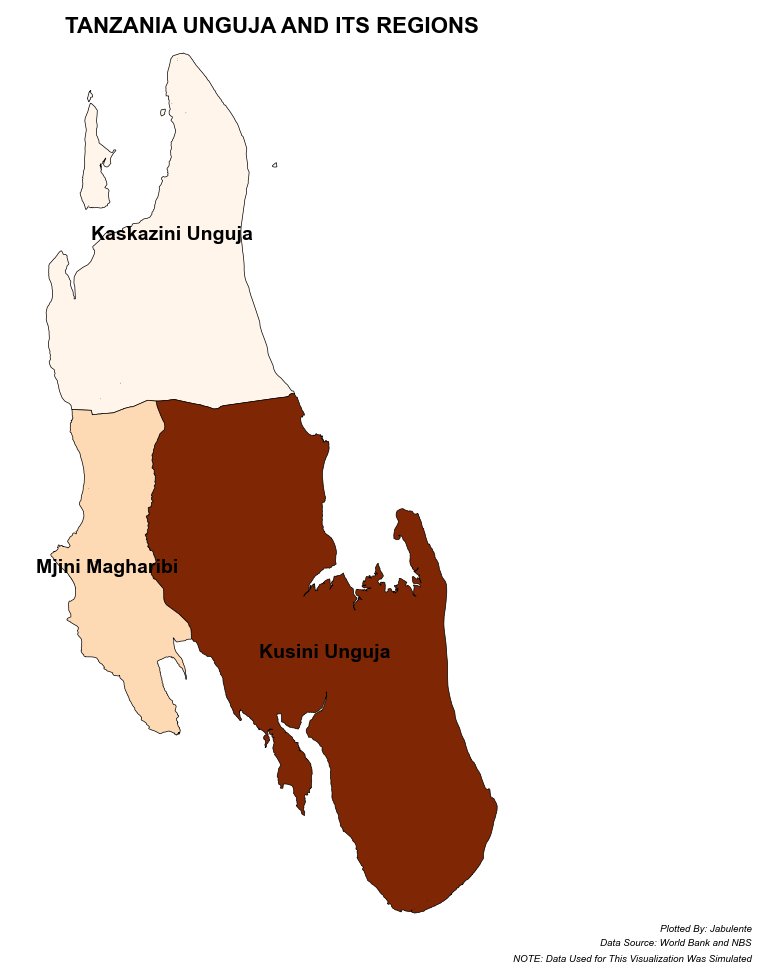

In [25]:

def annotate_regions(zone_gdf: gpd.GeoDataFrame, ax, color: str = "black", fontsize: int = 12):
    for _, row in zone_gdf.iterrows():
        try:
            point = row.geometry.representative_point()  # safer than centroid
            ax.text(
                point.x,
                point.y,
                row.get("Region_Nam", "Unknown"),
                fontsize=fontsize,
                ha="center",
                va="center",
                weight="bold",
                color=color,
            )
        except Exception as e:
            print(f"Skipping region due to geometry issue: {e}")


def add_footer_and_credits(fig, created_by: str = "Jabulente"):
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M")
    footer_text = f"Data Source: World Bank | Created by: {created_by} | Generated: {timestamp}"
    fig.text(0.5, 0.02, footer_text, ha="center", va="center", fontsize=10, weight="bold", color="white", style="italic")

    # Credits
    credit_params = dict(x=0.98, ha="right", size=7, font="Arial", va="bottom", style="italic")
    fig.text(y=0.0489, s=f"Plotted By: {created_by}", **credit_params)
    fig.text(y=0.0349, s="Data Source: World Bank and NBS", **credit_params)
    fig.text(y=0.019, s="NOTE: Data Used for This Visualization Was Simulated", **credit_params)


def visualize_regions(
    gdf: gpd.GeoDataFrame,
    zones: Dict[str, List[str]],
    output_path: Optional[str] = None,
    cmap: str = "viridis"
):
    plt.rcParams.update({"font.family": "Arial", "font.size": 18})

    for zone_name, regions in zones.items():
        zone_gdf = gdf[gdf["Region_Nam"].isin(regions)]
        fig, ax = plt.subplots(figsize=(10, 10), facecolor="white")
        
        cmap_name = random.choice(plt.colormaps())
        zone_gdf.plot(ax=ax, column="salary", cmap='Oranges', edgecolor="black", linewidth=0.5, legend=False)
        annotate_regions(zone_gdf, ax, fontsize=14)

        # Add title
        title = f"Tanzania {zone_name} and Its Regions"
        fig.text(0.5, 0.95, title.upper(), color="black", fontweight="bold", ha="center", size=16)

        # Add footer & credits
        add_footer_and_credits(fig)

        # Clean axes
        ax.axis("off")
        fig.tight_layout()

        # Save if path provided
        if output_path:
            filename = f"{output_path}/{zone_name}.png"
            plt.savefig(filename, dpi=300, bbox_inches="tight")
            print(f"Saved map: {filename}")

        plt.show()


if __name__ == "__main__":
    gdf = load_dataset(REGIONS_SHAPEFILE)
    visualize_regions(gdf, TANZANIA_ZONES, OUTPUT_PATH)


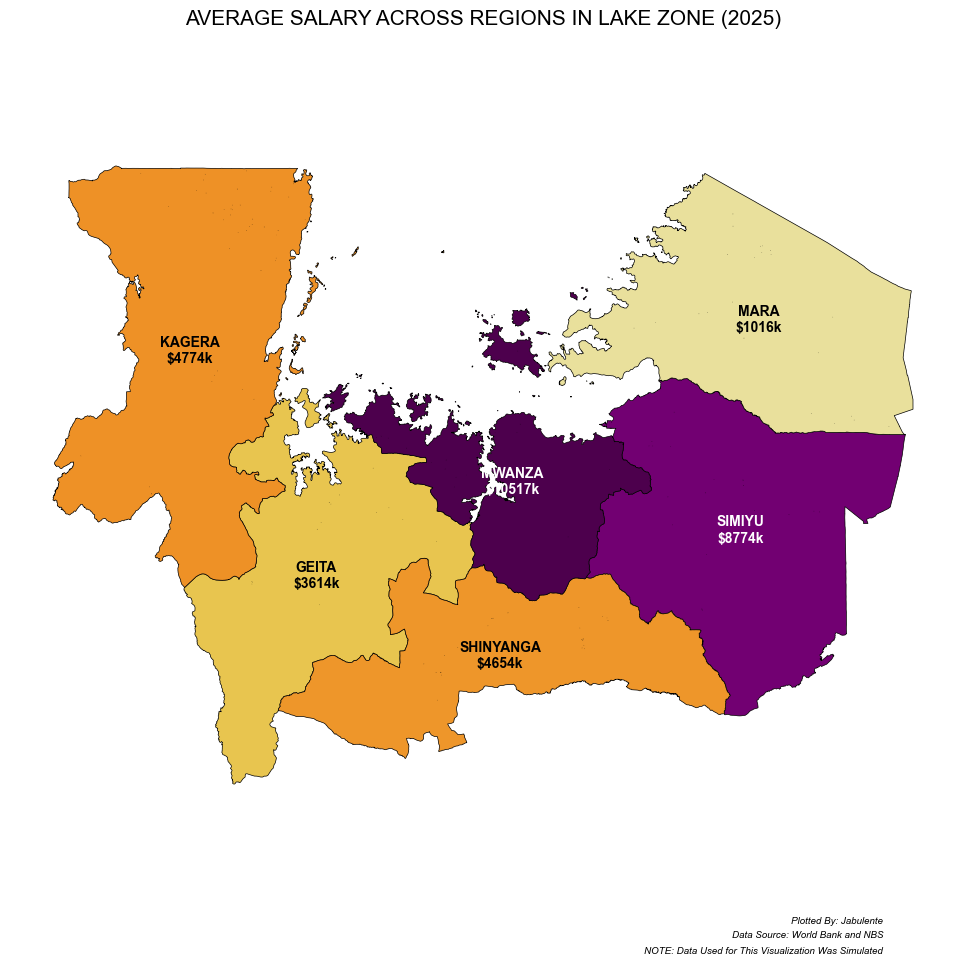

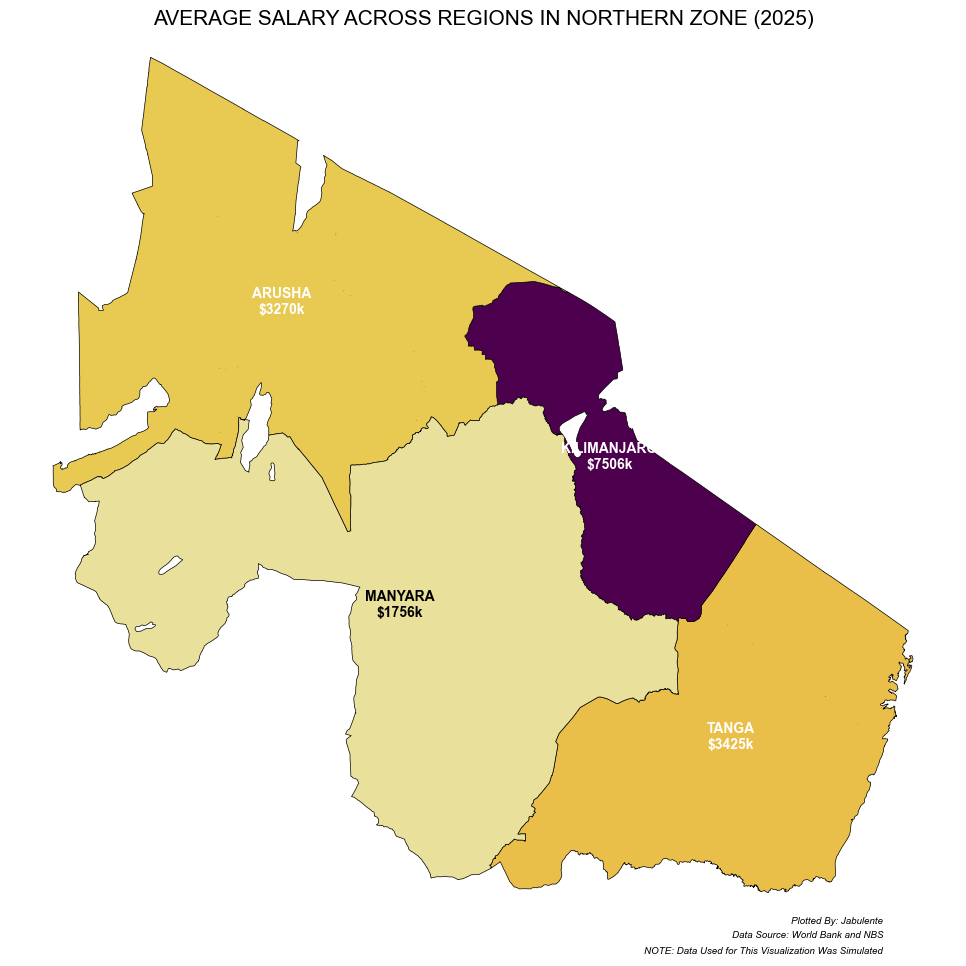

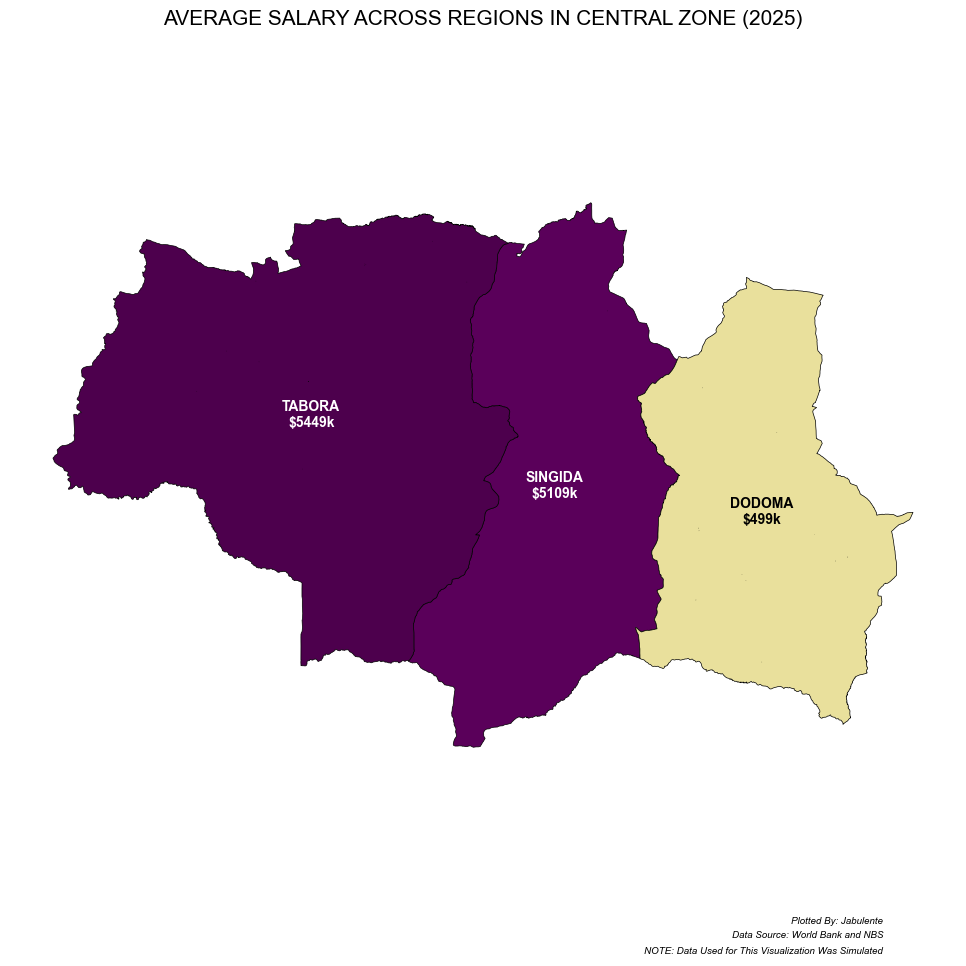

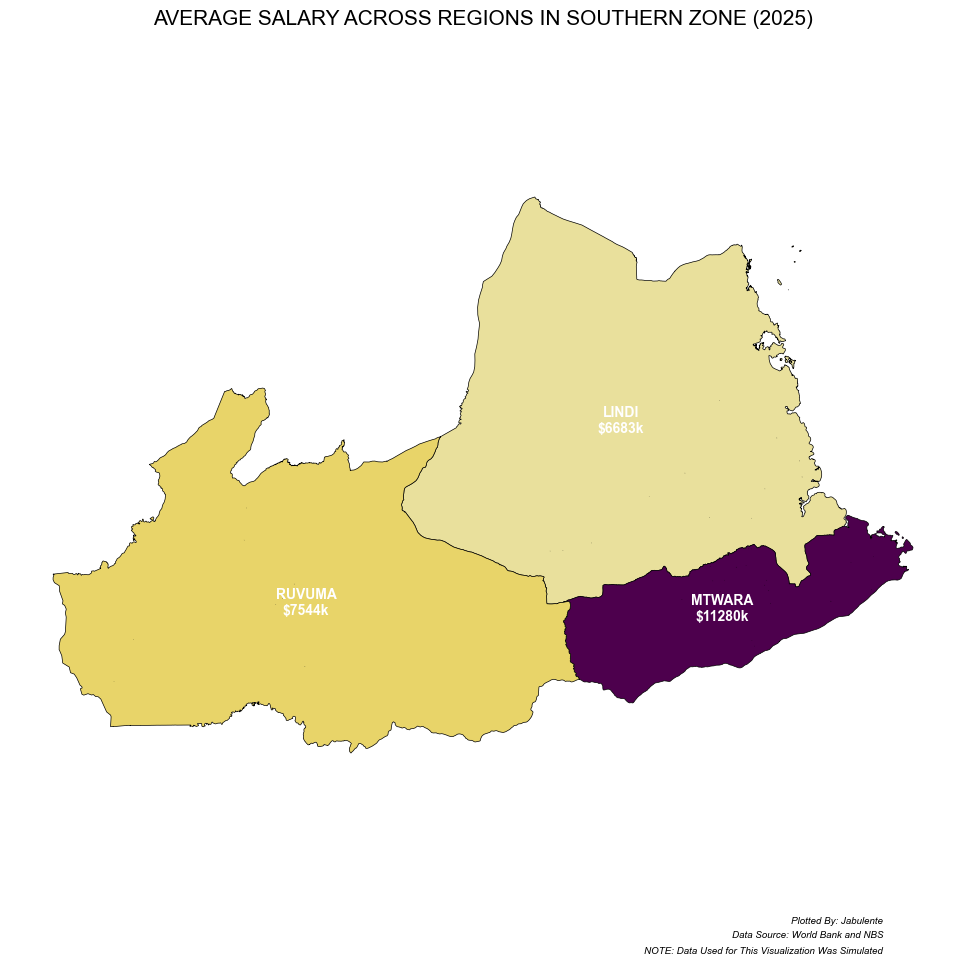

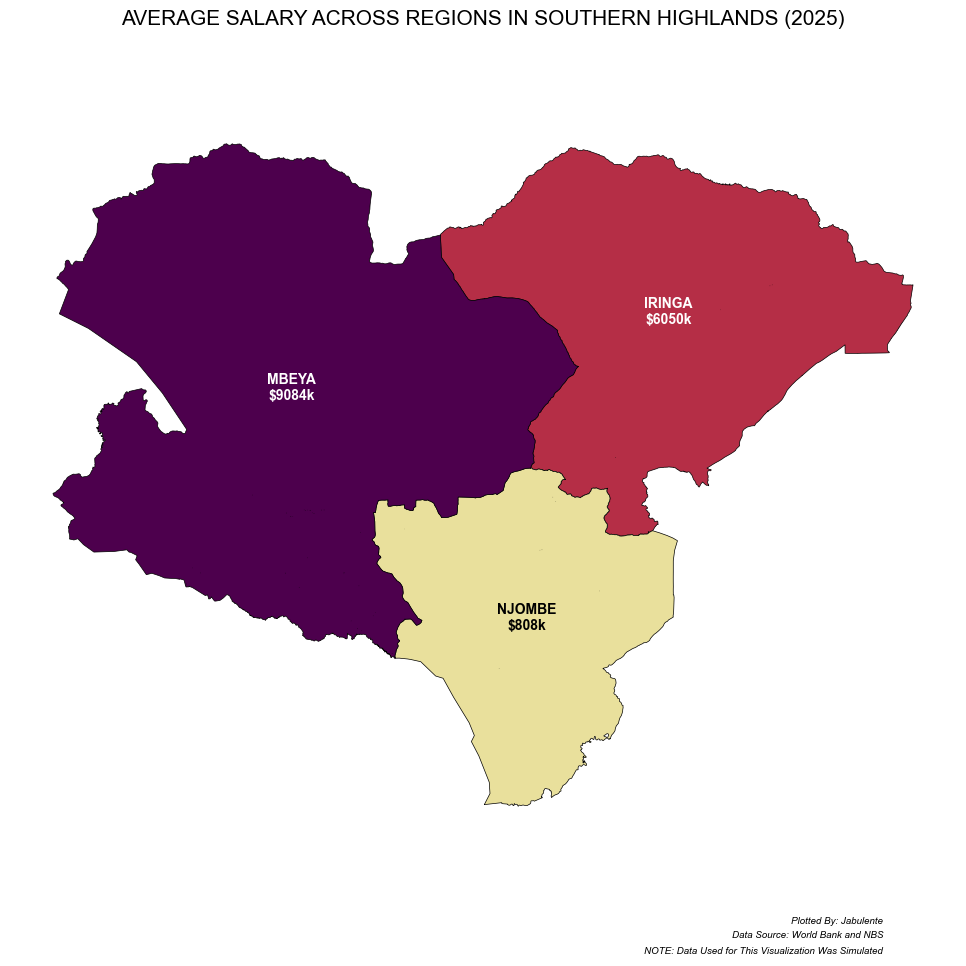

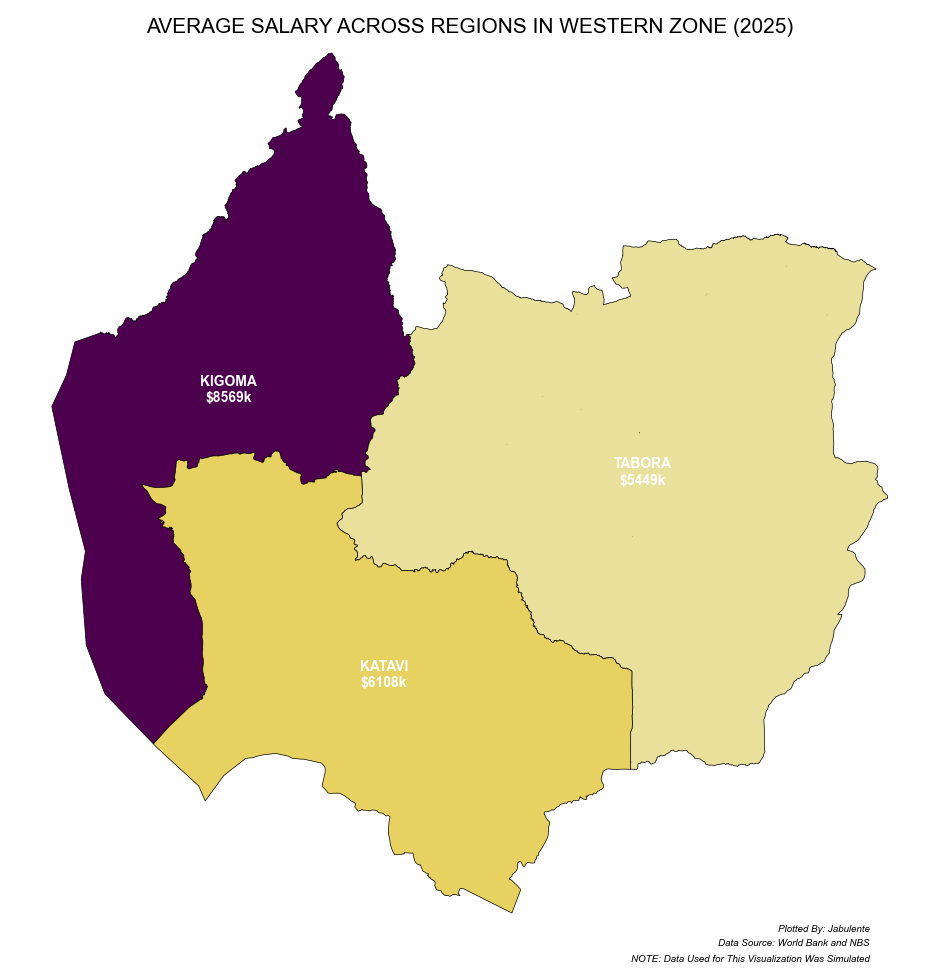

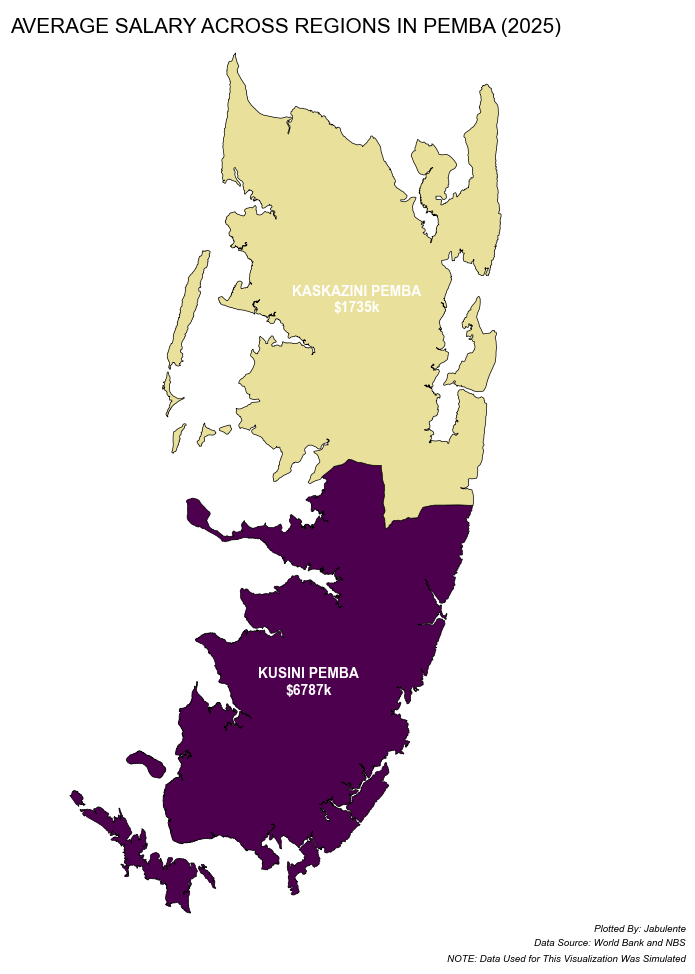

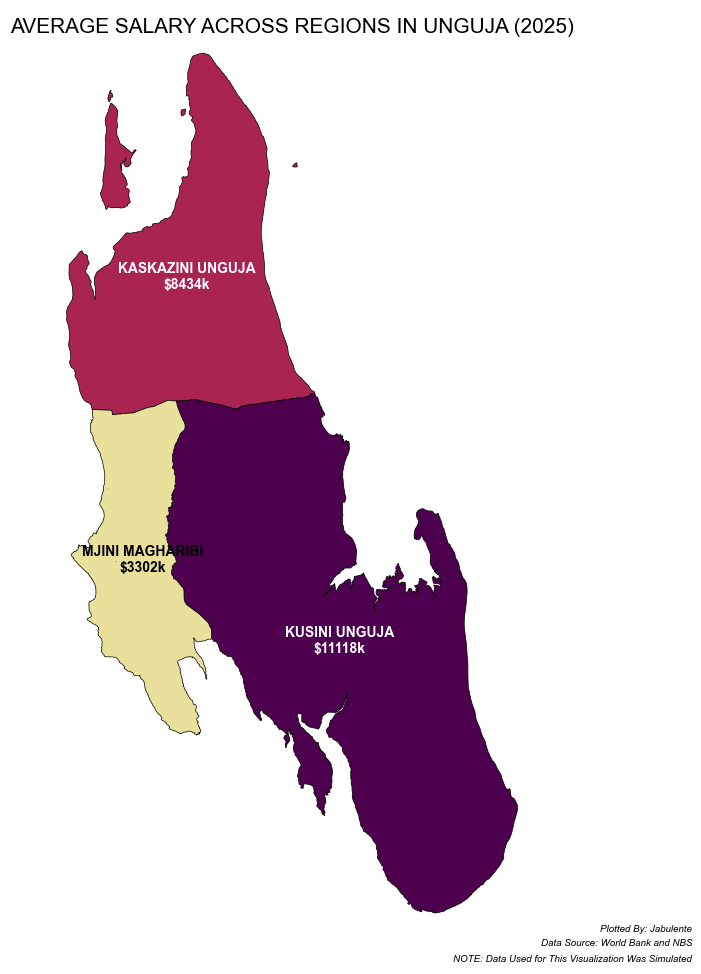

In [12]:
import geopandas as gpd
from pypalettes import load_cmap
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd


def load_dataset(filepath: str) -> gpd.GeoDataFrame:
    gdf = gpd.read_file(filepath)
    gdf["salary"] = np.random.randint(400, 12000, size=len(gdf))

    gdf_projected = gdf.to_crs(epsg=3035)
    gdf_projected["centroid"] = gdf_projected.geometry.centroid
    gdf["centroid"] = gdf_projected["centroid"].to_crs(gdf.crs)

    return gdf


def annotate_map(gdf, locations_col: str, value_col: str, exclude: list = None, adjustments: dict = None, ax=None,):
    if ax is None:
        raise ValueError("You must pass an `ax` object for annotation.")

    if exclude is None:
        exclude = []

    adjustments = adjustments or {}

    locations_to_annotate = [loc for loc in gdf[locations_col].to_list() if loc not in exclude]
    total_value = gdf[value_col].sum()

    for location in locations_to_annotate:
        centroid = gdf.loc[gdf[locations_col] == location, "centroid"].values[0]
        x_val, y_val = centroid.coords[0]

        if location in adjustments:
            dx, dy = adjustments[location]
            x_val += dx
            y_val += dy

        value = gdf.loc[gdf[locations_col] == location, value_col].values[0]
        color_text = "white" if value >= total_value * 0.2 else "black"

        ax.text(
            x=x_val,
            y=y_val,
            s=f"{location.upper()}\n${value:.0f}k",
            fontsize=10,
            font="Arial",
            color=color_text,
            weight="bold",
            ha="center",
            va="center",
        )


def plot_map(gdf, zones: dict):
    for zone_name, regions in zones.items():
        zone_gdf = gdf[gdf["Region_Nam"].isin(regions)]
        cmap = load_cmap("enara", cmap_type="continuous", reverse=True)

        fig, ax = plt.subplots(figsize=(10, 10))
        title = f"Average Salary Across Regions in {zone_name} (2025)"
        fig.text(x=0.5, y=0.95, s=title.upper(), ha="center", size=15, font="Arial",)

        credit_params = dict(x=0.9, ha="right", size=7, font="Arial", va="bottom", style="italic")
        fig.text(y=0.0489, s="Plotted By: Jabulente", **credit_params)
        fig.text(y=0.0349, s="Data Source: World Bank and NBS", **credit_params)
        fig.text(y=0.019, s="NOTE: Data Used for This Visualization Was Simulated", **credit_params,)

        zone_gdf.plot(ax=ax, column="salary", cmap=cmap, edgecolor="black", linewidth=0.5)
        annotate_map(zone_gdf, locations_col="Region_Nam", value_col="salary", ax=ax)
        ax.axis("off")

        fig.tight_layout()
        #plt.savefig(f"./Outputs/{zone_name}.png", dpi=300, bbox_inches="tight")
        plt.show()


if __name__ == "__main__":
    gdf = load_dataset("./Datasets/Regions.shp")
    plot_map(gdf, TANZANIA_ZONES)